# CHAPTER 3 신경망

입력층, 은닉층, 출력층

활성화 함수(activation function) <br>
y = h(x) <br> <br>
h(x) = 1 / 1 + exp(-x)


In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

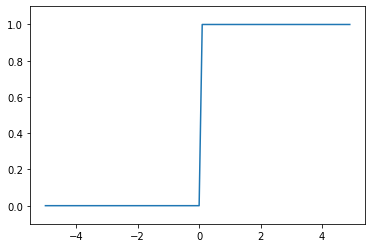

In [3]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [6]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [7]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

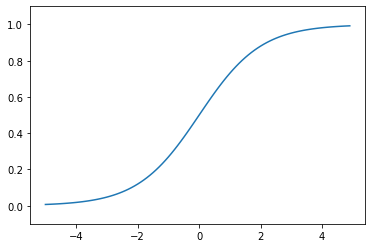

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

### 3.2.6 비선형함수

계단 함수, 시그모이드 함수 모두 비선형 함수이다.<br>
신경망에서는 황성화 함수로 비선형 함수를 사용해야 한다.<br>
선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다.<br>
h(x) = cx를 예시로 들 때, y(x) = h(h(h(x)))는 y(x) = c * c * c * x으로 결국 y(x) = ax (a = c^3)와 똑같은 식이다.<br>
그러므로 활성화 함수로는 반드시 비선형 함수를 사용해야한다.

In [9]:
def relu(x):
    return np.maximum(0, x)

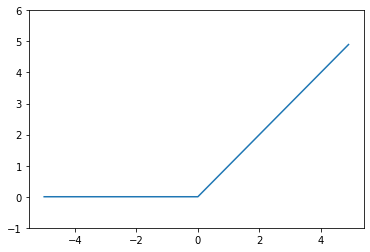

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1, 6) # y축 범위 지정
plt.show()

### 3.4 3층 신경망 구현하기

A = XW + B

In [11]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [12]:
Z1 = sigmoid(A1)
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [13]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.5]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [14]:
def identity_function(x):
    return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

출력층의 활성화 함수는 문제의 성질에 따라 정한다.<br>
회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적이다.

In [15]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.5]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(A2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31412417 0.69087328]


소프트맥스 함수

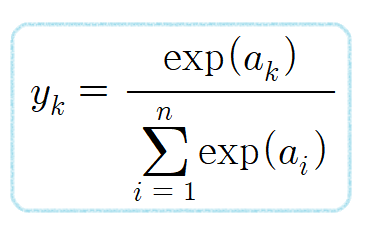

In [16]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [17]:
def softmax(a):
    exp_a = np_exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

소프트맥스 함수 구현 시 오버프로 문제가 발생할 수 있다.<br>
그러므로 다음과 같이 C 값을 추가한다

In [18]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 오버플로 대책.
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.6 손글씨 숫자 인식

In [19]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from PIL import Image

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [20]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 원래 이미지의 모양으로 변형
print(img.shape)  # (28, 28)

img_show(img)

5
(784,)
(28, 28)


In [21]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

FileNotFoundError: [Errno 2] No such file or directory: 'sample_weight.pkl'